In [0]:
#importing dependencies
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import keras
from keras.layers import Conv2D ,Conv2DTranspose ,MaxPooling2D ,concatenate ,Input
from keras.models import Model
import numpy as np
import os
#code for unet
def unet(input_size=(256,256,1)):
    inputs = Input(input_size)
    
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

    up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

    up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

    up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

    up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    return Model(inputs=[inputs], outputs=[conv10])
#gets the left ,upper ,right ,bottom coordinates to crop 
def get_max_pixel(mask):
    i_list = []
    j_list = []
    for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
            if mask[i][j][0] >= 0.5 :
                i_list.append(i)
                j_list.append(j)
    j = 0
    try :
        K = [int(0.8*min(i_list)) ,int(min(j_list)) ,int(1.2*max(i_list)) ,int(max(j_list))]
    except:
        K = [0 ,0 ,224 ,224]
        print('error masko')
        j = j+1
    for i in range(3):
        if K[i] >= 224:
            K[i] = 224
    return K ,j
#crops the image such that only lungs will be fit tightly into the frame
def my_preprocessor(image):
    image_resized = cv2.resize(image ,(224 ,224))
    gray = cv2.cvtColor(image_resized, cv2.COLOR_RGB2GRAY)
    gray = (gray-127.0)/127.0
    mask = segment.predict(gray.reshape((1,224,224,1))).reshape(224 ,224 ,1)
    k ,i = get_max_pixel(mask)
    if i == 1:
        plt.imshow(image_resized)
    semi = Image.fromarray(np.uint8(image_resized))
    final_cropped = semi.crop(tuple(k))
    final_cropped = cv2.resize(np.array(final_cropped) ,(224 ,224))
    return final_cropped
#crops and saves to the required directory
def crop_and_save(load_dir ,save_dir):
    image = cv2.imread(load_dir)
    processed_image = my_preprocessor(image)
    cv2.imwrite(save_dir ,processed_image)
    print('{} is cropped and saved'.format(save_dir))


Using TensorFlow backend.


In [0]:
#mounting the google drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Streaming output truncated to the last 5000 lines.
/content/gdrive/My Drive/segment-cropped-dataset/train/PNEUMONIA/person586_virus_1130.jpeg is cropped and saved
/content/gdrive/My Drive/segment-cropped-dataset/train/PNEUMONIA/person587_bacteria_2421.jpeg is cropped and saved
/content/gdrive/My Drive/segment-cropped-dataset/train/PNEUMONIA/person588_bacteria_2422.jpeg is cropped and saved
/content/gdrive/My Drive/segment-cropped-dataset/train/PNEUMONIA/person588_bacteria_2423.jpeg is cropped and saved
/content/gdrive/My Drive/segment-cropped-dataset/train/PNEUMONIA/person588_virus_1134.jpeg is cropped and saved
/content/gdrive/My Drive/segment-cropped-dataset/train/PNEUMONIA/person588_virus_1135.jpeg is cropped and saved
/content/gdrive/My Drive/segment-cropped-dataset/train/PNEUMONIA/person589_bacteria_2424.jpeg is cropped and saved
/content/gdrive/My Drive/segment-cropped-dataset/train/PNEUMONIA/person589_bacteria_2425.jpeg is cropped and saved
/content/gdrive/My Drive/segment-cropp

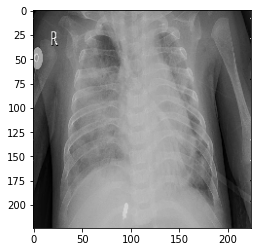

In [0]:
#directories can be adjusted accoding the where you place the dataset
print('hello')
directory = '/content/gdrive/My Drive/pneumonia_chest_x-ray_data/chest_xray' 
segment = unet(input_size=(224 ,224 ,1))
segment.load_weights('/content/gdrive/My Drive/segmentation_of_lungs'+'/cxr_reg_weights.best.hdf5')
folders = os.listdir(directory)
#crops and saves the entire dataset to the required directory
for folder in folders:
    print(folder)
    save_dir = '/content/gdrive/My Drive/segment-cropped-dataset'
    os.mkdir(os.path.join(save_dir ,folder))
    save_dir = save_dir +'/'+ folder
    load_dir = directory +'/'+ folder
    for subfolder in os.listdir(load_dir):
        print('***',subfolder)
        os.mkdir(os.path.join(save_dir ,subfolder))
        sub_save_dir = save_dir + '/' + subfolder
        present_load_dir = os.path.join(load_dir ,subfolder)
        for file in os.listdir(present_load_dir):
            file_name = present_load_dir + '/' + file
            present_save_dir = sub_save_dir + '/' + file
            crop_and_save(file_name ,present_save_dir)
    